# Masterclass Qiskit — 1 • Superposition & Parallélisme

**Objectif :** comprendre la superposition et l'idée de parallélisme **sans portes avancées** et **sans sphère de Bloch**.  
**Uniquement** : `H`, `X`, `CX`, mesures, histogrammes.

**Plan (≈35–45 min)**  
1. 1 qubit : `H` crée 50/50 ; `X` inverse.  
2. 2 qubits : superposition uniforme (`H` sur tous) et sélective (`H` sur un seul).  
3. Parallélisme (intuition Deutsch, mini-version) : distinguer **constante** vs **équilibrée** avec une seule passe.
4. Exercices courts et auto-vérifs.

## 0. Imports

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.result import counts
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

backend = Aer.get_backend('qasm_simulator')

## 1. Un seul qubit :

In [ ]:
# Créer un circuit nommé qc_hx avec un qubit, ajouter H puis ajouter X

counts_hx = backend.run(transpile(qc_hx, backend), shots=4096).result().get_counts()

In [ ]:
# Créer un circuit nommé qc_xh avec un qubit, ajouter X puis ajouter H

counts_xh = backend.run(transpile(qc_xh, backend), shots=4096).result().get_counts()

In [ ]:
counts_hx, counts_xh

**À retenir** : `H` crée une **superposition**. `X` inverse 0 ↔ 1. L'ordre des opérations **compte**.

## 2. Deux qubits : superposition simple

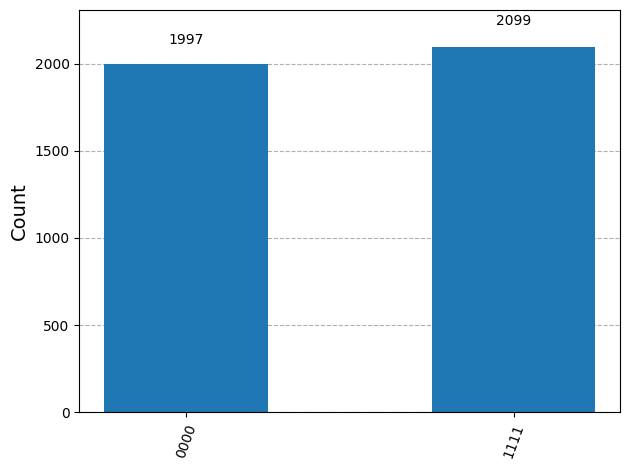

In [38]:
# Superposition uniforme sur 2 qubits : H sur chacun
qc2 = QuantumCircuit(4, 4)
# Créer un circuit à 2 qubits
qc2.h(0)
qc2.cx(0, 1)
qc2.cx(0, 2)
qc2.cx(0, 3)
qc2.measure(0,0)
qc2.measure(1,1)
qc2.measure(2,2)
qc2.measure(3,3)
plot_histogram(backend.run(transpile(qc2, backend), shots=4096).result().get_counts())


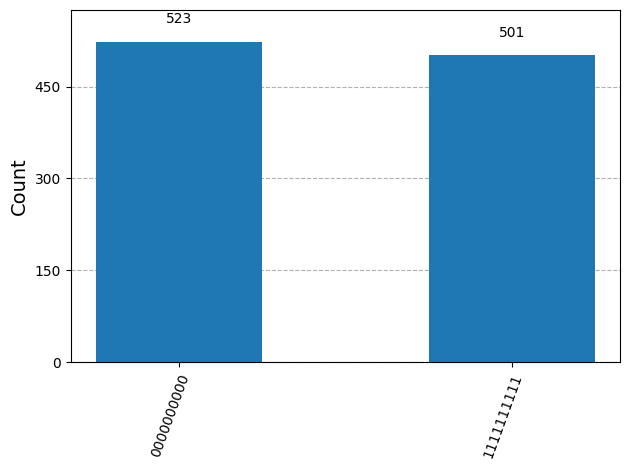

In [45]:
def fnt(n):
    qc = QuantumCircuit(n, n)
    qc.h(0)
    for i in range(1, n):
        qc.cx(0, i)
    for j in range(n):
        qc.measure(j, j)


        # Lancer l'exécution du circuit sur un simulateur
    backend_ = Aer.get_backend('qasm_simulator')
    compiled = transpile(qc, backend_)
    result = backend_.run(compiled, shots=1024).result()
    count = result.get_counts()

    return count

plot_histogram(fnt(10))

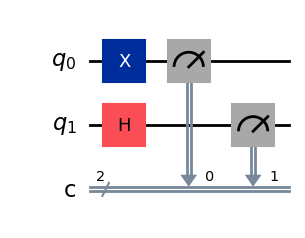

In [11]:
qc2.draw('mpl')

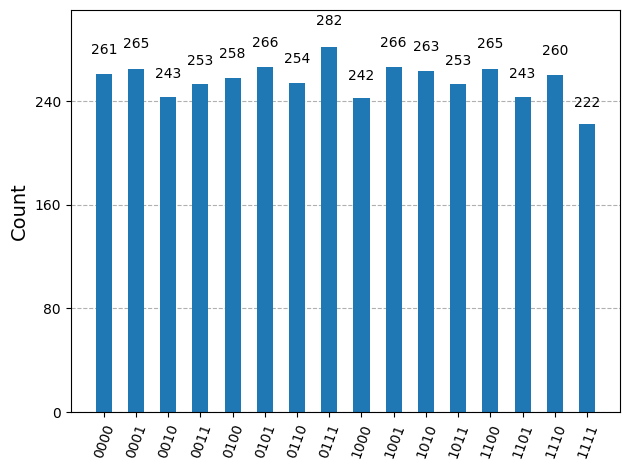

In [9]:
qc4 = QuantumCircuit(4, 4)
qc4.h(0)
qc4.h(1)
qc4.h(2)
qc4.h(3)
qc4.measure(0,0)
qc4.measure(1,1)
qc4.measure(2,2)
qc4.measure(3,3)

plot_histogram(backend.run(transpile(qc4, backend), shots=4096).result().get_counts())

In [ ]:
# Superposition sélective : H seulement sur le premier qubit

# Créer un circuit à 2 qubits

qc2_sel.measure([0,1],[0,1])
plot_histogram(backend.run(transpile(qc2_sel, backend), shots=4096).result().get_counts())

**Lecture** : `H` sur tous les qubits crée `2^n` chemins simultanés. 

## 3. Exercices
1. **Trois qubits uniformes** : créer une superposition uniforme sur 3 qubits et vérifier que les 8 issues apparaissent.
2. **Superposition pour n qubits*** : écrire une fonction qui prend en paramètres n, un nombre de qubits et renvoie toujours une superposition uniforme.
3. **Sélectif** : créer une superposition uniquement sur le qubit du milieu (q1) dans un circuit 3 qubits ; observer la distribution.
4. **Sélectif généralisé** : créer une superpositon sur le qubit du milieu pour n qubits (n impaire).

In [ ]:
# Exo 3 — zone de réponse
qc_ex2 = QuantumCircuit(3,3)

# Placer H uniquement sur q1

qc_ex2.measure([0,1,2],[0,1,2])
plot_histogram(backend.run(transpile(qc_ex2, backend), shots=4096).result().get_counts())

## 4. Parallélisme (intuition Deutsch très simple)
**Problème** : on a une fonction binaire `f` sur 1 bit (donc 2 entrées possibles `0` ou `1`).  
On veut savoir si `f` est **constante** (renvoie toujours le même bit) ou **équilibrée** (sorties différentes selon l'entrée).  
**Idée** : préparer l'entrée en superposition, faire passer **toutes** les entrées d’un coup, puis lire un motif caractéristique.

In [46]:
def deutsch_constant0():
    # Créer un circuit avec deux qubits et un bit
    qc = QuantumCircuit(2, 1)
    # Ajouter H sur le premier qubit
    qc.h(0)
    # Ajouter X sur le second qubit
    qc.x(1)
    # f(x)=0 : ne rien faire sur ce circuit

    # Ajouter H sur le second qubit
    qc.h(1)
    # Ajouter H sur le premier qubit
    qc.h(0)
    # Mesurer le premier qubit
    qc.measure(0, 0)
    return qc

def deutsch_constant1():
    # Créer un circuit avec deux qubits et un bit
    qc = QuantumCircuit(2, 1)
    # Ajouter H sur le premier qubit
    qc.h(0)
    # Ajouter X sur le second qubit
    qc.x(1)
    # f(x)=1 : ajouter X sur le second qubit qui est l'auxiliaire
    qc.x(1)
    # Ajouter H sur le second qubit
    qc.h(1)
    # Ajouter H sur le premier qubit
    qc.h(0)
    # Mesurer le premier qubit
    qc.measure(0, 0)
    return qc

def deutsch_balanced_identity():
    # Créer un circuit avec deux qubits et un bit
    qc = QuantumCircuit(2, 1)
    # Ajouter H sur le premier qubit
    qc.h(0)
    # Ajouter X sur le second qubit
    qc.x(1)
    # f(x)=x : ajouter CNOT sur les qubits avec le second qubit comme qubit cible
    qc.cx(0, 1)
    # Ajouter H sur le second qubit
    qc.h(1)
    # Ajouter H sur le premier qubit
    qc.h(0)
    # Mesurer le premier qubit
    qc.measure(0, 0)
    return qc

In [67]:
def lancer_deutsch(choix: int, shots: int = 1024):
    if choix == 1:
        # Renvoyer un circuit quantique exécutant la première fonction
        qc =  deutsch_constant0()
    elif choix == 2:
        # Renvoyer un circuit quantique exécutant la deuxième fonction
        qc =  deutsch_constant1()
    elif choix == 3:
        # Renvoyer un circuit quantique exécutant la troisième fonction
        qc =  deutsch_balanced_identity()
    else:
        raise ValueError("choix doit être 1, 2 ou 3")

    counts_ = backend.run(transpile(qc, backend), shots=4096).result().get_counts()

    # Deutsch (n=1) :
    # Renvoyer la bonne information selon le résultat, celle de  la clé du dictionnaire "shots"
    keys = list(counts_.keys())

    if  len(keys) == 1:
        print("Constante")
    else:
        print("Equilibrée")

lancer_deutsch(3)

Equilibrée


In [71]:
def lancer_deutsch(choix: int, shots: int = 1024):
    if choix == 1:
        # Renvoyer un circuit quantique exécutant la première fonction
        qc =  deutsch_constant0()
    elif choix == 2:
        # Renvoyer un circuit quantique exécutant la deuxième fonction
        qc =  deutsch_constant1()
    elif choix == 3:
        # Renvoyer un circuit quantique exécutant la troisième fonction
        qc =  deutsch_balanced_identity()
    else:
        raise ValueError("choix doit être 1, 2 ou 3")

    counts_ = backend.run(transpile(qc, backend), shots=4096).result().get_counts()

    # Deutsch (n=1) :
    # Renvoyer la bonne information selon le résultat, celle de  la clé du dictionnaire "shots"
    keys = list(counts_.keys())

    if 1 in keys:
        print("Constante")
    else:
        print("Equi")


lancer_deutsch(3)

Equi
